## Assignment  no: 1
## Your name: Huda Aisyah Khoirunissa           student ID: 1144833
### When you use code, either from another student or an outside source, you should cite it. Tell me where the code comes from. 
#### ( v  )  1. I Totally write by myself (都自己寫)
#### (    ) 2. Refer to other students (參考同學,註明姓名學號):   name and student id 
#### (    ) 3. Refer to outside sources (參考外部資料網站), where:
## If you choose 2 or 3, tell me how similar you are. (如果選2,3, 請勾選相似程度)
#### ( ) < 25% ( ) 25%..50% ( ) 50%..75% ( v ) > 75%
### Give me your expected score (給我你的期望分數): 85
### Reasons (理由): I understand the core concepts of data wrangling: identifying and handling missing values ​​(including special cases like '?'), loading data, cleaning (drop/impute), and visualizing distributions. The final results are as instructed. My weakness is that I occasionally forget to translate logic into concise/idiomatic code, which takes time to clean up the implementation (e.g., bin consistency, color/label mapping, and pandas operation chaining). This is an area I'm working on improving.

## If you use AI, you must clearly state what AI was used for and how it was used in your submission. Answer the following questions: (若有使用AI, 需說明AI使用的內容與方式, 回答底下問題)
- The tool you used (使用的AI工具名稱) = ChatGPT
- How you used it (lookup / debugging / code snippet) (使用的方式) = I use ChatGPT for debugging and lookup, especially when I forget Python/Pandas/Matplotlib syntax or logic. ChatGPT helps me add additional functions to achieve the desired results. For example, when replacing missing data (?), I forgot to add a regular expression option, resulting in imperfect results. Furthermore, when creating visualizations, I had difficulty adding poor and rich labels, so I tried to improve my coding with ChatGPT's help.
- How you modified and understood the result (修改與理解過程) = I didn't copy the answers directly, but instead read the results from ChatGPT and adapted them to my needs. For example, I learned why regex=True is necessary to ensure ? is recognized as a missing value, then I retested it with isna().sum(). For visualization, I understood how to map colors and labels so the legend displays as instructed. This way, I wasn't just copying and pasting, but also understood the logic of the code changes and validated the results.

## 說明與心得 explain your code briefly, tell me something, and share your experience.
I started by loading the data, then replacing the '?' values ​​with NaN using replace with the regex=True option. This is important because if they weren't replaced with NaN, they wouldn't have been identified as missing. I then counted the number of rows with missing values ​​(±3,620) and cleaned them with dropna(). Finally, I created a histogram visualization of the age distribution by income category, with orange for poor (<=50K) and blue for rich (>50K).

From this experience, I learned that handling missing values ​​can be tricky—for example, using numpy.nan to ensure pandas recognizes the data as truly missing. I also gained a better understanding of the importance of small details like using regex=True and validating the results with isna().sum() before moving on to the analysis and visualization stages.


### Load the Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
print([data == '?'])

[         age  workclass  fnlwgt  education  educational-num  marital-status  \
0      False      False   False      False            False           False   
1      False      False   False      False            False           False   
2      False      False   False      False            False           False   
3      False      False   False      False            False           False   
4      False       True   False      False            False           False   
...      ...        ...     ...        ...              ...             ...   
48837  False      False   False      False            False           False   
48838  False      False   False      False            False           False   
48839  False      False   False      False            False           False   
48840  False      False   False      False            False           False   
48841  False      False   False      False            False           False   

       occupation  relationship   race  gender  ca

In [8]:
import numpy as np

In [9]:
replaced_data = data.replace(r'^\s*\?\s*$', np.nan, regex=True)

In [10]:
rows_with_nan = replaced_data[replaced_data.isnull().any(axis=1)]
print("Total rows with missing values:", len(rows_with_nan))

Total rows with missing values: 3620


### Drop Missing Value

In [11]:
replaced_data = replaced_data.dropna()

In [12]:
replaced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [13]:
replaced_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Data Visualization

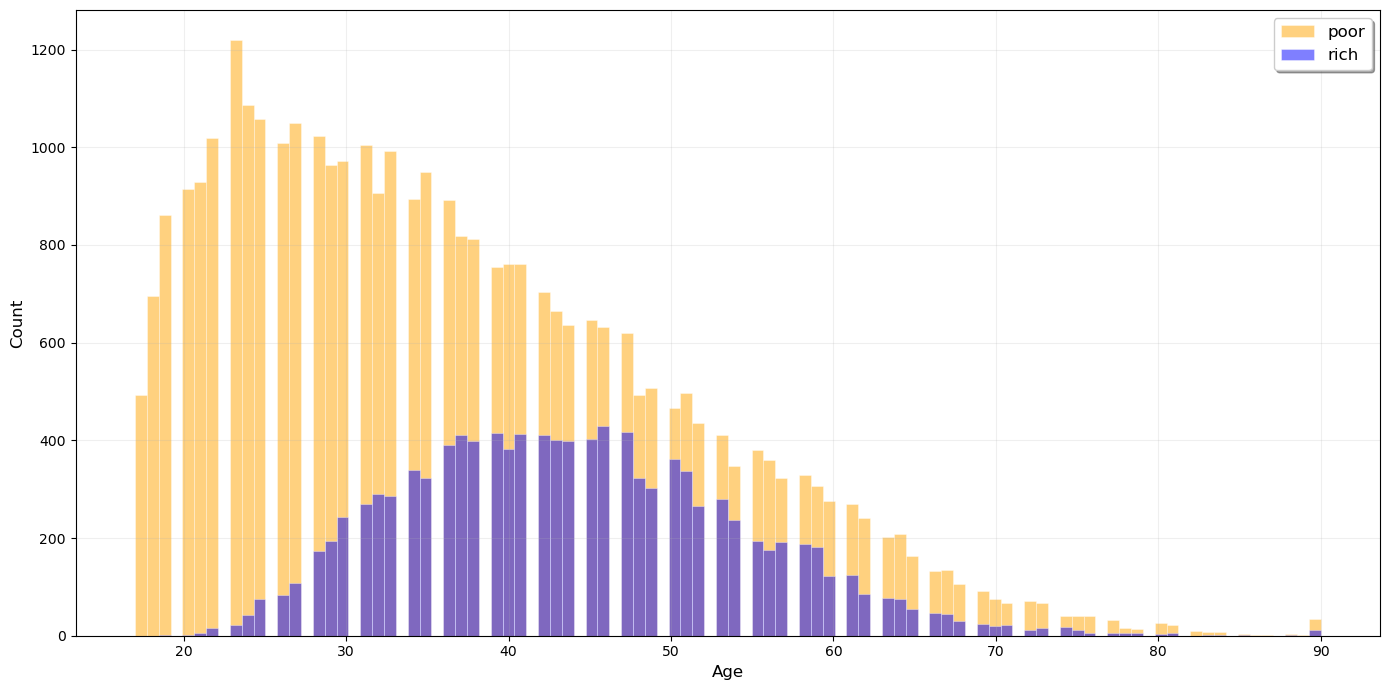

In [16]:
plt.figure(figsize=(14, 7))

colors = {'<=50K': 'orange', '>50K': 'blue'}
labels = {'<=50K': 'poor', '>50K': 'rich'}

bins = np.histogram_bin_edges(replaced_data['age'], bins=100)

for income, group in replaced_data.groupby('income'):
    plt.hist(group['age'], bins=bins, alpha=0.5,
             label=labels[income], color=colors[income],
             edgecolor='white', linewidth=0.5)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='upper right', shadow=True, fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()